In [195]:
import tensorflow as tf
import keras.backend as K
import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [196]:
import matplotlib.image as mpimg
from PIL import Image

In [197]:
#Creating the custom images
directory = r'C:\Users\Spencer\Desktop\New folder'
image_list = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    image = Image.open(f)
    image = image.resize((50, 70))
    im = image.convert("RGB")
    image_list.append(np.asarray(im))

In [198]:
x_train = np.array(image_list)[:9]
x_test = np.array(image_list)[9:]
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [199]:
x_train.shape

(9, 70, 50, 3)

In [200]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (9, 70, 50, 3)
x_test shape: (4, 70, 50, 3)


In [201]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [202]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [203]:
codings_size = 5

inputs = keras.layers.Input(shape=[70,50, 3])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(50, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(
    
    inputs=[inputs],
    outputs=[codings_mean, codings_log_var, codings]
)

In [204]:
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(50, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(70*50*3, activation="sigmoid")(x)
outputs = keras.layers.Reshape([70,50,3])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [205]:
_,_,codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

In [206]:
latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 10500.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])

In [207]:
history = variational_ae.fit(
    x_train,
    x_train,
    epochs=500,
    batch_size=256,
    validation_data=[x_test, x_test],
)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.6954 - rounded_accuracy: 0.5000 - val_loss: 0.7005 - val_rounded_accuracy: 0.5002
Epoch 2/500
1/1 [==============================] - 0s 147ms/step - loss: 0.6998 - rounded_accuracy: 0.5002 - val_loss: 0.7054 - val_rounded_accuracy: 0.4974
Epoch 3/500
1/1 [==============================] - 0s 144ms/step - loss: 0.7030 - rounded_accuracy: 0.4979 - val_loss: 0.7031 - val_rounded_accuracy: 0.4984
Epoch 4/500
1/1 [==============================] - 0s 134ms/step - loss: 0.7017 - rounded_accuracy: 0.4991 - val_loss: 0.6974 - val_rounded_accuracy: 0.5054
Epoch 5/500
1/1 [==============================] - 0s 148ms/step - loss: 0.6966 - rounded_accuracy: 0.5027 - val_loss: 0.6980 - val_rounded_accuracy: 0.4955
Epoch 6/500
1/1 [==============================] - 0s 129ms/step - loss: 0.6974 - rounded_accuracy: 0.4959 - val_loss: 0.6959 - val_rounded_accuracy: 0.5037
Epoch 7/500
1/1 [==============================] - 0s 131ms/s

Epoch 53/500
1/1 [==============================] - 0s 151ms/step - loss: 0.6819 - rounded_accuracy: 0.6537 - val_loss: 0.6906 - val_rounded_accuracy: 0.5821
Epoch 54/500
1/1 [==============================] - 0s 141ms/step - loss: 0.6815 - rounded_accuracy: 0.6568 - val_loss: 0.6903 - val_rounded_accuracy: 0.5882
Epoch 55/500
1/1 [==============================] - 0s 131ms/step - loss: 0.6808 - rounded_accuracy: 0.6609 - val_loss: 0.6900 - val_rounded_accuracy: 0.5896
Epoch 56/500
1/1 [==============================] - 0s 131ms/step - loss: 0.6803 - rounded_accuracy: 0.6631 - val_loss: 0.6908 - val_rounded_accuracy: 0.5853
Epoch 57/500
1/1 [==============================] - 0s 137ms/step - loss: 0.6797 - rounded_accuracy: 0.6640 - val_loss: 0.6903 - val_rounded_accuracy: 0.5913
Epoch 58/500
1/1 [==============================] - 0s 132ms/step - loss: 0.6798 - rounded_accuracy: 0.6702 - val_loss: 0.6938 - val_rounded_accuracy: 0.5785
Epoch 59/500
1/1 [==============================] - 

Epoch 105/500
1/1 [==============================] - 0s 134ms/step - loss: 0.6559 - rounded_accuracy: 0.7289 - val_loss: 0.6991 - val_rounded_accuracy: 0.6086
Epoch 106/500
1/1 [==============================] - 0s 128ms/step - loss: 0.6543 - rounded_accuracy: 0.7339 - val_loss: 0.6833 - val_rounded_accuracy: 0.6589
Epoch 107/500
1/1 [==============================] - 0s 133ms/step - loss: 0.6514 - rounded_accuracy: 0.7461 - val_loss: 0.6869 - val_rounded_accuracy: 0.6353
Epoch 108/500
1/1 [==============================] - 0s 156ms/step - loss: 0.6483 - rounded_accuracy: 0.7464 - val_loss: 0.6834 - val_rounded_accuracy: 0.6565
Epoch 109/500
1/1 [==============================] - 0s 150ms/step - loss: 0.6480 - rounded_accuracy: 0.7572 - val_loss: 0.6901 - val_rounded_accuracy: 0.6303
Epoch 110/500
1/1 [==============================] - 0s 128ms/step - loss: 0.6477 - rounded_accuracy: 0.7478 - val_loss: 0.6837 - val_rounded_accuracy: 0.6578
Epoch 111/500
1/1 [===========================

1/1 [==============================] - 0s 130ms/step - loss: 0.6245 - rounded_accuracy: 0.7891 - val_loss: 0.6732 - val_rounded_accuracy: 0.7157
Epoch 208/500
1/1 [==============================] - 0s 179ms/step - loss: 0.6224 - rounded_accuracy: 0.7987 - val_loss: 0.6774 - val_rounded_accuracy: 0.6964
Epoch 209/500
1/1 [==============================] - 0s 131ms/step - loss: 0.6220 - rounded_accuracy: 0.7996 - val_loss: 0.6743 - val_rounded_accuracy: 0.6977
Epoch 210/500
1/1 [==============================] - 0s 130ms/step - loss: 0.6213 - rounded_accuracy: 0.8012 - val_loss: 0.6760 - val_rounded_accuracy: 0.6952
Epoch 211/500
1/1 [==============================] - 0s 163ms/step - loss: 0.6208 - rounded_accuracy: 0.7989 - val_loss: 0.6735 - val_rounded_accuracy: 0.7020
Epoch 212/500
1/1 [==============================] - 0s 148ms/step - loss: 0.6217 - rounded_accuracy: 0.8001 - val_loss: 0.6817 - val_rounded_accuracy: 0.6727
Epoch 213/500
1/1 [==============================] - 0s 148m

1/1 [==============================] - 0s 155ms/step - loss: 0.6150 - rounded_accuracy: 0.8138 - val_loss: 0.6756 - val_rounded_accuracy: 0.6913
Epoch 310/500
1/1 [==============================] - 0s 132ms/step - loss: 0.6152 - rounded_accuracy: 0.8157 - val_loss: 0.6761 - val_rounded_accuracy: 0.6883
Epoch 311/500
1/1 [==============================] - 0s 131ms/step - loss: 0.6152 - rounded_accuracy: 0.8129 - val_loss: 0.6749 - val_rounded_accuracy: 0.6944
Epoch 312/500
1/1 [==============================] - 0s 178ms/step - loss: 0.6151 - rounded_accuracy: 0.8159 - val_loss: 0.6758 - val_rounded_accuracy: 0.6936
Epoch 313/500
1/1 [==============================] - 0s 199ms/step - loss: 0.6152 - rounded_accuracy: 0.8170 - val_loss: 0.6750 - val_rounded_accuracy: 0.6953
Epoch 314/500
1/1 [==============================] - 0s 130ms/step - loss: 0.6150 - rounded_accuracy: 0.8142 - val_loss: 0.6753 - val_rounded_accuracy: 0.6905
Epoch 315/500
1/1 [==============================] - 0s 130m

1/1 [==============================] - 0s 142ms/step - loss: 0.6086 - rounded_accuracy: 0.8392 - val_loss: 0.6731 - val_rounded_accuracy: 0.7019
Epoch 412/500
1/1 [==============================] - 0s 142ms/step - loss: 0.6081 - rounded_accuracy: 0.8390 - val_loss: 0.6735 - val_rounded_accuracy: 0.7017
Epoch 413/500
1/1 [==============================] - 0s 142ms/step - loss: 0.6082 - rounded_accuracy: 0.8374 - val_loss: 0.6754 - val_rounded_accuracy: 0.6906
Epoch 414/500
1/1 [==============================] - 0s 141ms/step - loss: 0.6081 - rounded_accuracy: 0.8380 - val_loss: 0.6741 - val_rounded_accuracy: 0.7010
Epoch 415/500
1/1 [==============================] - 0s 138ms/step - loss: 0.6081 - rounded_accuracy: 0.8392 - val_loss: 0.6744 - val_rounded_accuracy: 0.6962
Epoch 416/500
1/1 [==============================] - 0s 163ms/step - loss: 0.6079 - rounded_accuracy: 0.8387 - val_loss: 0.6734 - val_rounded_accuracy: 0.7080
Epoch 417/500
1/1 [==============================] - 0s 136m

### Generating images

In [210]:
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()

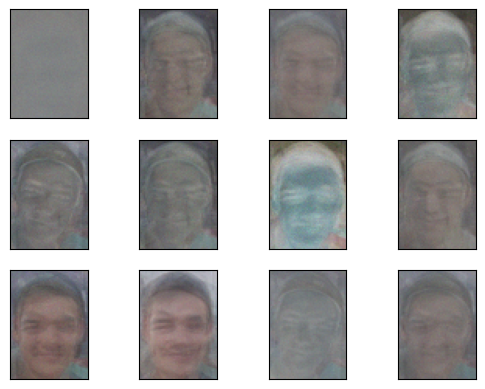

In [211]:
fig, ax = plt.subplots(3, 4)
x = 0
for i in range(3):
    for j in range(4):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].imshow(images[x])
        x += 1

### It is also possible to interpolate the images at the coding level to create an image that is somewhere between two images

In [212]:
codings_grid = tf.reshape(codings, [1,3,4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

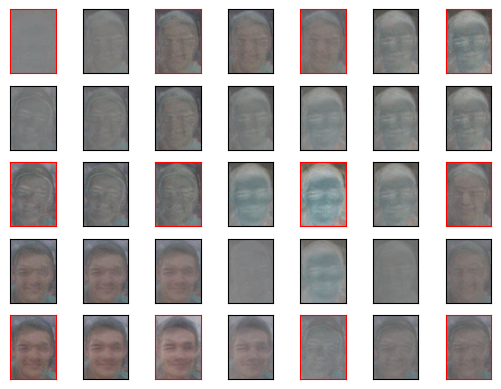

In [213]:
fig, ax = plt.subplots(5, 7)
x = 0
for i in range(5):
    for j in range(7):
        if i % 2 == 0 and j % 2 == 0:
            plt.setp(ax[i,j].spines.values(), color="red")
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].imshow(images[x], cmap="binary")
        x += 1